In [1]:
library(Seurat)
library(tidyverse)
library(ggpubr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.1     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

Warning message:
“package ‘tibble’ was built under R version 3.6.3”
Warning message:
“package ‘tidyr’ was built under R version 3.6.3”
Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggpubr’ was built under R version 3.6.3”


In [2]:
bcc = readRDS('/SGRNJ/SingleronDB/Public/cancer/c243/rds/c243.bcc.rds')

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


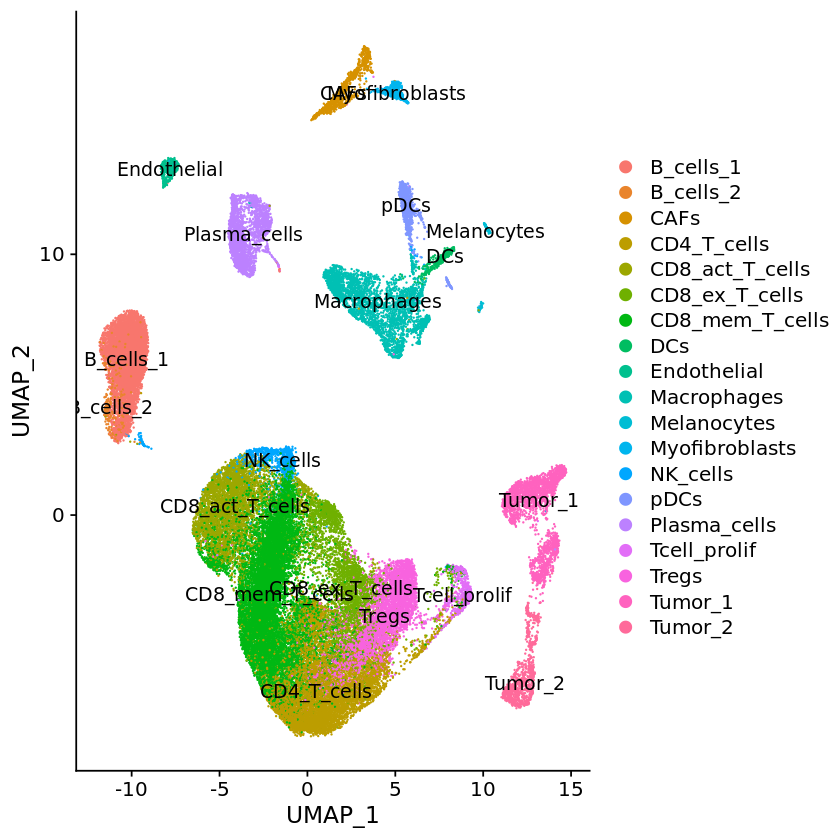

In [4]:
DimPlot(object = bcc, reduction = "umap", label = T)

In [3]:
genes = rownames(GetAssayData(object = bcc, slot = "counts"))

In [4]:
head(bcc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,RNA_snn_res.0.6,seurat_clusters,cell_type,patient,sort_markers,treatment,tcr
,<fct>,<dbl>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
bcc_bcc.su001.post.tcell_AAACCTGAGCTTCGCG,bcc.su001.post.tcell,3405,1390,bcc,3.671072,0,0,CD8_mem_T_cells,su001,CD45+ CD3+,post,TCR
bcc_bcc.su001.post.tcell_AAACCTGAGGACATTA,bcc.su001.post.tcell,4328,1887,bcc,3.558226,1,1,CD8_ex_T_cells,su001,CD45+ CD3+,post,TCR
bcc_bcc.su001.post.tcell_AAACCTGCACGCATCG,bcc.su001.post.tcell,3890,1505,bcc,5.784062,0,0,CD8_mem_T_cells,su001,CD45+ CD3+,post,TCR
bcc_bcc.su001.post.tcell_AAACCTGCAGATGGGT,bcc.su001.post.tcell,5117,1748,bcc,3.556772,0,0,CD8_mem_T_cells,su001,CD45+ CD3+,post,TCR
bcc_bcc.su001.post.tcell_AAACCTGCAGTGGAGT,bcc.su001.post.tcell,3833,1662,bcc,3.000261,1,1,Tregs,su001,CD45+ CD3+,post,TCR
bcc_bcc.su001.post.tcell_AAACCTGCATGCCTTC,bcc.su001.post.tcell,4208,1822,bcc,3.730989,1,1,CD8_ex_T_cells,su001,CD45+ CD3+,post,TCR


In [134]:
table(bcc@meta.data$treatment)


 post   pre 
31249 20969 

###### mito.genes = grep(pattern = "MT-", x = genes, value = TRUE)
mito.genes

In [6]:
setwd('/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/0928_public/bcc')

In [7]:
info = readr::read_tsv('./BCC_sample_info.txt')

Parsed with column specification:
cols(
  .default = col_character(),
  `PBMC Adaptive days pre treatment` = col_double(),
  `PBMC Adaptive days post treatment` = col_double(),
  `Exome days pre treatment` = col_double(),
  `Exome days post treatment` = col_double()
)

See spec(...) for full column specifications.



In [8]:
info.bcc = info[info['Tumor Type'] == 'BCC',]

Warning message:
“The `i` argument of ``[`()` can't be a matrix as of tibble 3.0.0.
Convert to a vector.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [9]:
res.dic = as.vector(info.bcc$Response)

In [10]:
res.dic

[1] "Yes" "Yes" "Yes" "Yes" "No"  "No"  "No"  "No"  "Yes" "No"  "Yes"

In [11]:
names(res.dic) = as.vector(info.bcc$Patient)

In [12]:
res.dic

su001 su002 su003 su004 su005 su006 su007 su008 su009 su010 su012 
"Yes" "Yes" "Yes" "Yes"  "No"  "No"  "No"  "No" "Yes"  "No" "Yes"

In [13]:
bcc@meta.data$response = res.dic[bcc@meta.data$patient]

In [14]:
head(bcc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,RNA_snn_res.0.6,seurat_clusters,cell_type,patient,sort_markers,treatment,tcr,response
,<fct>,<dbl>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>
bcc_bcc.su001.post.tcell_AAACCTGAGCTTCGCG,bcc.su001.post.tcell,3405,1390,bcc,3.671072,0,0,CD8_mem_T_cells,su001,CD45+ CD3+,post,TCR,Yes
bcc_bcc.su001.post.tcell_AAACCTGAGGACATTA,bcc.su001.post.tcell,4328,1887,bcc,3.558226,1,1,CD8_ex_T_cells,su001,CD45+ CD3+,post,TCR,Yes
bcc_bcc.su001.post.tcell_AAACCTGCACGCATCG,bcc.su001.post.tcell,3890,1505,bcc,5.784062,0,0,CD8_mem_T_cells,su001,CD45+ CD3+,post,TCR,Yes
bcc_bcc.su001.post.tcell_AAACCTGCAGATGGGT,bcc.su001.post.tcell,5117,1748,bcc,3.556772,0,0,CD8_mem_T_cells,su001,CD45+ CD3+,post,TCR,Yes
bcc_bcc.su001.post.tcell_AAACCTGCAGTGGAGT,bcc.su001.post.tcell,3833,1662,bcc,3.000261,1,1,Tregs,su001,CD45+ CD3+,post,TCR,Yes
bcc_bcc.su001.post.tcell_AAACCTGCATGCCTTC,bcc.su001.post.tcell,4208,1822,bcc,3.730989,1,1,CD8_ex_T_cells,su001,CD45+ CD3+,post,TCR,Yes


In [15]:
library(ggplot2)
pdf('identity_response_dotplot.pdf',height=12,width=8)
DotPlot(object = bcc, features = mito.genes, split.by = 'response') + labs(x='mito genes',y='identity_response') + RotatedAxis()
dev.off()

png 
  2

In [16]:
bcc@meta.data$new_type = paste(bcc@meta.data$cell_type, bcc@meta.data$response, sep="_")

In [17]:
Idents(object = bcc) <- 'new_type' #add cell type as idents

In [18]:
head(Idents(object = bcc))

bcc_bcc.su001.post.tcell_AAACCTGAGCTTCGCG 
                      CD8_mem_T_cells_Yes 
bcc_bcc.su001.post.tcell_AAACCTGAGGACATTA 
                       CD8_ex_T_cells_Yes 
bcc_bcc.su001.post.tcell_AAACCTGCACGCATCG 
                      CD8_mem_T_cells_Yes 
bcc_bcc.su001.post.tcell_AAACCTGCAGATGGGT 
                      CD8_mem_T_cells_Yes 
bcc_bcc.su001.post.tcell_AAACCTGCAGTGGAGT 
                                Tregs_Yes 
bcc_bcc.su001.post.tcell_AAACCTGCATGCCTTC 
                       CD8_ex_T_cells_Yes 
38 Levels: CD8_mem_T_cells_Yes CD8_ex_T_cells_Yes Tregs_Yes ... Tumor_2_No

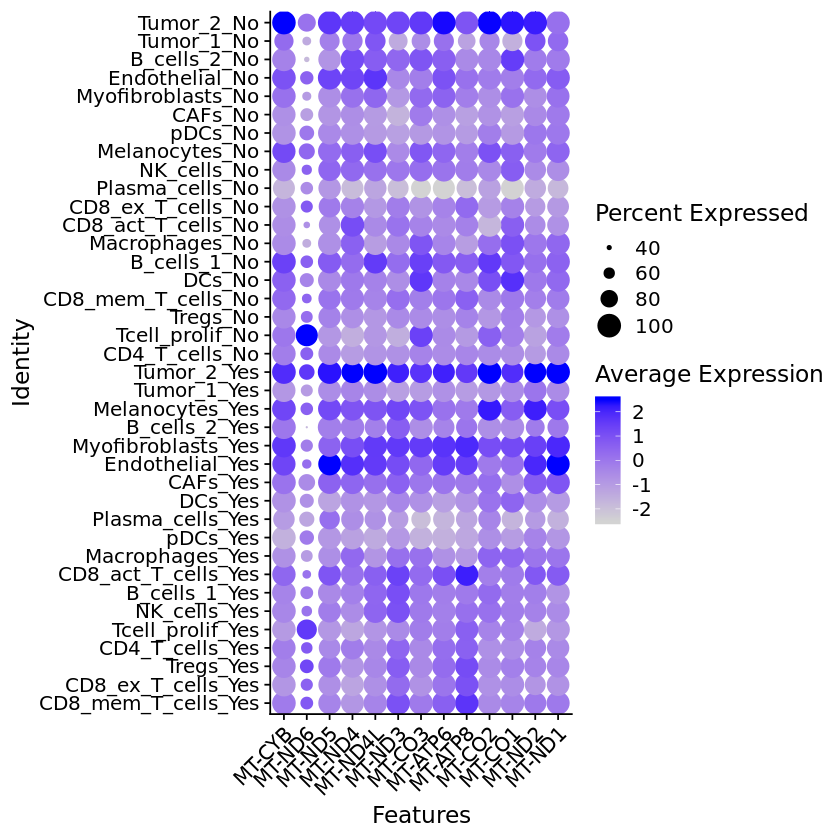

In [19]:
DotPlot(object = bcc, features = mito.genes) + RotatedAxis()

In [20]:
Idents(object = bcc) <- 'new_type'
levels.sort = sort(levels(Idents(object = bcc)))

In [21]:
Idents(object = bcc) = factor(Idents(object = bcc), levels = levels.sort)

In [22]:
pdf('identity_response_dotplot_correct.pdf',height=12,width=8)
DotPlot(object = bcc, features = mito.genes) + RotatedAxis()
dev.off()

png 
  2

In [23]:
cell_type = unique(bcc@meta.data$cell_type)

In [24]:
cell_type

[1] CD8_mem_T_cells CD8_ex_T_cells  Tregs           CD4_T_cells    
 [5] Tcell_prolif    NK_cells        B_cells_1       CD8_act_T_cells
 [9] Macrophages     pDCs            Plasma_cells    DCs            
[13] CAFs            Endothelial     Myofibroblasts  B_cells_2      
[17] Melanocytes     Tumor_1         Tumor_2        
19 Levels: B_cells_1 B_cells_2 CAFs CD4_T_cells ... Tumor_2

In [95]:
length(VariableFeatures(object = bcc))

[1] 2000

In [97]:
genes.test = c(VariableFeatures(object = bcc) ,mito.genes)

In [101]:
unique(Idents(object = bcc))
bcc@meta.data$new_type = paste(bcc@meta.data$cell_type, bcc@meta.data$response, sep="_")
Idents(object = bcc) <- 'new_type'
unique(Idents(object = bcc))

[1] su001 su002 su003 su004 su005 su006 su007 su008 su009 su010 su012
11 Levels: su001 su002 su003 su004 su005 su006 su007 su008 su009 ... su012

[1] CD8_mem_T_cells_Yes CD8_ex_T_cells_Yes  Tregs_Yes          
 [4] CD4_T_cells_Yes     Tcell_prolif_Yes    NK_cells_Yes       
 [7] B_cells_1_Yes       CD8_act_T_cells_Yes Macrophages_Yes    
[10] pDCs_Yes            Plasma_cells_Yes    DCs_Yes            
[13] CAFs_Yes            Endothelial_Yes     Myofibroblasts_Yes 
[16] B_cells_2_Yes       Melanocytes_Yes     Tumor_1_Yes        
[19] Tumor_2_Yes         CD4_T_cells_No      Tcell_prolif_No    
[22] Tregs_No            CD8_mem_T_cells_No  DCs_No             
[25] B_cells_1_No        Macrophages_No      CD8_act_T_cells_No 
[28] CD8_ex_T_cells_No   Plasma_cells_No     NK_cells_No        
[31] Melanocytes_No      pDCs_No             CAFs_No            
[34] Myofibroblasts_No   Endothelial_No      B_cells_2_No       
[37] Tumor_1_No          Tumor_2_No         
38 Levels: CD8_mem_T_cells_Yes CD8_ex_T_cells_Yes Tregs_Yes ... Tumor_2_No

In [131]:
index = 0
for (type in cell_type){
    index = index + 1
    print(type)
    yes = str_glue('{type}_Yes')
    no = str_glue('{type}_No')
    tryCatch({
        markers = FindMarkers(bcc, ident.1=yes, ident.2=no, features = mito.genes)
        markers$cell_type = type
        markers = tibble::rownames_to_column(markers, 'gene')
        if (index==1){
            all_markers = markers
        } else {
            all_markers = rbind(all_markers, markers)
        }        
    },error=function(e){print('no marker')} )

}

[1] "CD8_mem_T_cells"
[1] "CD8_ex_T_cells"
[1] "Tregs"
[1] "CD4_T_cells"
[1] "Tcell_prolif"
[1] "NK_cells"
[1] "B_cells_1"
[1] "CD8_act_T_cells"
[1] "Macrophages"
[1] "no marker"
[1] "pDCs"
[1] "Plasma_cells"
[1] "DCs"
[1] "CAFs"
[1] "Endothelial"
[1] "Myofibroblasts"
[1] "B_cells_2"
[1] "Melanocytes"
[1] "Tumor_1"
[1] "Tumor_2"


In [132]:
all.dat = all_markers[all_markers$p_val_adj <0.05,]

In [133]:
write_tsv(all.dat, 'MT_marker_Yes_vs_No.tsv')

In [25]:
# 
Idents(object = bcc) <- 'patient'

In [26]:
avg = AverageExpression(bcc, features = mito.genes)

Finished averaging RNA for cluster su001

Finished averaging RNA for cluster su002

Finished averaging RNA for cluster su003

Finished averaging RNA for cluster su004

Finished averaging RNA for cluster su005

Finished averaging RNA for cluster su006

Finished averaging RNA for cluster su007

Finished averaging RNA for cluster su008

Finished averaging RNA for cluster su009

Finished averaging RNA for cluster su010

Finished averaging RNA for cluster su012



In [27]:
avg$RNA

,su001,su002,su003,su004,su005,su006,su007,su008,su009,su010,su012
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-ND1,13.056265,22.426453,16.799296,25.308687,22.710408,12.079695,17.032916,14.572496,17.339783,11.437965,12.592339
MT-ND2,11.132217,18.091004,13.572365,16.323021,12.586833,9.196445,12.854812,11.393589,11.563563,9.089558,10.703061
MT-CO1,71.995251,77.465774,65.540194,60.801341,82.562829,42.961811,74.679085,93.529323,67.518616,69.376556,51.661559
MT-CO2,68.732027,68.560708,55.480457,76.825394,80.149018,49.964305,53.306388,50.400988,56.392326,49.061588,40.474597
MT-ATP8,22.728382,28.720641,16.531873,28.617688,21.245672,12.262511,20.722618,21.892217,37.833075,31.538836,21.899594
MT-ATP6,36.471537,39.551474,34.938070,42.741612,41.809042,26.367398,36.771201,40.494599,50.318476,41.183575,42.747332
MT-CO3,37.481309,46.186012,32.043834,45.833658,55.606019,21.551684,41.825917,40.147644,39.408943,30.566978,25.819140
MT-ND3,39.589855,36.200173,29.525418,44.081235,22.523948,18.501897,32.168087,34.064911,39.876171,22.699124,26.162863
MT-ND4L,34.080179,34.136684,28.176910,36.837749,30.089396,27.420000,27.232793,30.096766,28.390603,21.263971,21.105421


In [61]:
dat0 = rownames_to_column(avg$RNA,'gene')

In [62]:
dat0

gene,su001,su002,su003,su004,su005,su006,su007,su008,su009,su010,su012
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MT-ND1,13.056265,22.426453,16.799296,25.308687,22.710408,12.079695,17.032916,14.572496,17.339783,11.437965,12.592339
MT-ND2,11.132217,18.091004,13.572365,16.323021,12.586833,9.196445,12.854812,11.393589,11.563563,9.089558,10.703061
MT-CO1,71.995251,77.465774,65.540194,60.801341,82.562829,42.961811,74.679085,93.529323,67.518616,69.376556,51.661559
MT-CO2,68.732027,68.560708,55.480457,76.825394,80.149018,49.964305,53.306388,50.400988,56.392326,49.061588,40.474597
MT-ATP8,22.728382,28.720641,16.531873,28.617688,21.245672,12.262511,20.722618,21.892217,37.833075,31.538836,21.899594
MT-ATP6,36.471537,39.551474,34.938070,42.741612,41.809042,26.367398,36.771201,40.494599,50.318476,41.183575,42.747332
MT-CO3,37.481309,46.186012,32.043834,45.833658,55.606019,21.551684,41.825917,40.147644,39.408943,30.566978,25.819140
MT-ND3,39.589855,36.200173,29.525418,44.081235,22.523948,18.501897,32.168087,34.064911,39.876171,22.699124,26.162863
MT-ND4L,34.080179,34.136684,28.176910,36.837749,30.089396,27.420000,27.232793,30.096766,28.390603,21.263971,21.105421


In [78]:
dat = tidyr::gather(dat0, key = 'patient',value='mito_exp',-gene)

In [79]:
dat

gene,patient,mito_exp
<chr>,<chr>,<dbl>
MT-ND1,su001,13.056265
MT-ND2,su001,11.132217
MT-CO1,su001,71.995251
MT-CO2,su001,68.732027
MT-ATP8,su001,22.728382
MT-ATP6,su001,36.471537
MT-CO3,su001,37.481309
MT-ND3,su001,39.589855
MT-ND4L,su001,34.080179


In [83]:
dat$response = res.dic[dat$patient]
head(dat)

,gene,patient,mito_exp,response
,<chr>,<chr>,<dbl>,<chr>
1,MT-ND1,su001,13.05626,Yes
2,MT-ND2,su001,11.13222,Yes
3,MT-CO1,su001,71.99525,Yes
4,MT-CO2,su001,68.73203,Yes
5,MT-ATP8,su001,22.72838,Yes
6,MT-ATP6,su001,36.47154,Yes


In [84]:
res.dic

su001 su002 su003 su004 su005 su006 su007 su008 su009 su010 su012 
"Yes" "Yes" "Yes" "Yes"  "No"  "No"  "No"  "No" "Yes"  "No" "Yes"

In [92]:
#library(ggpubr)
pdf('reponse_gene_boxplot_between_patients.pdf', height=12,width=10)
ggplot(dat, aes(x=response,y=mito_exp,fill=response)) + facet_wrap(~gene,ncol=3) +
  geom_boxplot(position = "dodge",outlier.shape = NA) + geom_jitter() + labs(title='Compare between patients') + 
    stat_compare_means( method="t.test",paired = F,aes(label = paste0("p = ", ..p.format..)), label.y=75 )
dev.off()


png 
  2

In [89]:
dat[(dat$gene=='MT-ATP8') & (dat$response=='No'),]

,gene,patient,mito_exp,response
,<chr>,<chr>,<dbl>,<chr>
57,MT-ATP8,su005,21.24567,No
70,MT-ATP8,su006,12.26251,No
83,MT-ATP8,su007,20.72262,No
96,MT-ATP8,su008,21.89222,No
122,MT-ATP8,su010,31.53884,No



FALSE  TRUE 
  132    11 

In [135]:
bcc.pre = subset(x = bcc, subset = treatment=='pre')

In [137]:
bcc.pre@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,RNA_snn_res.0.6,seurat_clusters,cell_type,patient,sort_markers,treatment,tcr,response,new_type
,<fct>,<dbl>,<int>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>
bcc_bcc.su001.pre_ACTGAACCACATGACT,bcc.su001.pre,1515,788,bcc,1.452145,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_ACTGAACGTAAGTTCC,bcc.su001.pre,4878,1712,bcc,3.772038,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_AGATCTGCAATGGAAT,bcc.su001.pre,4674,1652,bcc,5.091998,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_AGTAGTCCATTTGCTT,bcc.su001.pre,2155,884,bcc,4.083527,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_CAACCTCGTAAGGATT,bcc.su001.pre,5543,2111,bcc,2.958687,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_CACAAACTCGCCCTTA,bcc.su001.pre,4879,1783,bcc,1.988112,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_CACACAAAGGCGATAC,bcc.su001.pre,4932,2008,bcc,2.676399,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_CATATTCCATGATCCA,bcc.su001.pre,4208,1538,bcc,5.917300,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes
bcc_bcc.su001.pre_CATTCGCGTCAGAGGT,bcc.su001.pre,3595,1691,bcc,2.141864,0,0,CD8_mem_T_cells,su001,NA,pre,NotTCR,Yes,CD8_mem_T_cells_Yes


Warning message in dir.create(name):
“'pre' already exists”


png 
  2

[1] "CD8_mem_T_cells"
[1] "CD8_ex_T_cells"
[1] "Tregs"
[1] "CD4_T_cells"
[1] "Tcell_prolif"
[1] "NK_cells"
[1] "B_cells_1"
[1] "CD8_act_T_cells"
[1] "no marker"
[1] "Macrophages"
[1] "pDCs"
[1] "Plasma_cells"
[1] "DCs"
[1] "CAFs"
[1] "Endothelial"
[1] "Myofibroblasts"
[1] "B_cells_2"
[1] "no marker"
[1] "Melanocytes"
[1] "Tumor_1"
[1] "Tumor_2"


Finished averaging RNA for cluster su001

Finished averaging RNA for cluster su002

Finished averaging RNA for cluster su003

Finished averaging RNA for cluster su004

Finished averaging RNA for cluster su005

Finished averaging RNA for cluster su006

Finished averaging RNA for cluster su007

Finished averaging RNA for cluster su008

Finished averaging RNA for cluster su009

Finished averaging RNA for cluster su010

Finished averaging RNA for cluster su012



png 
  2

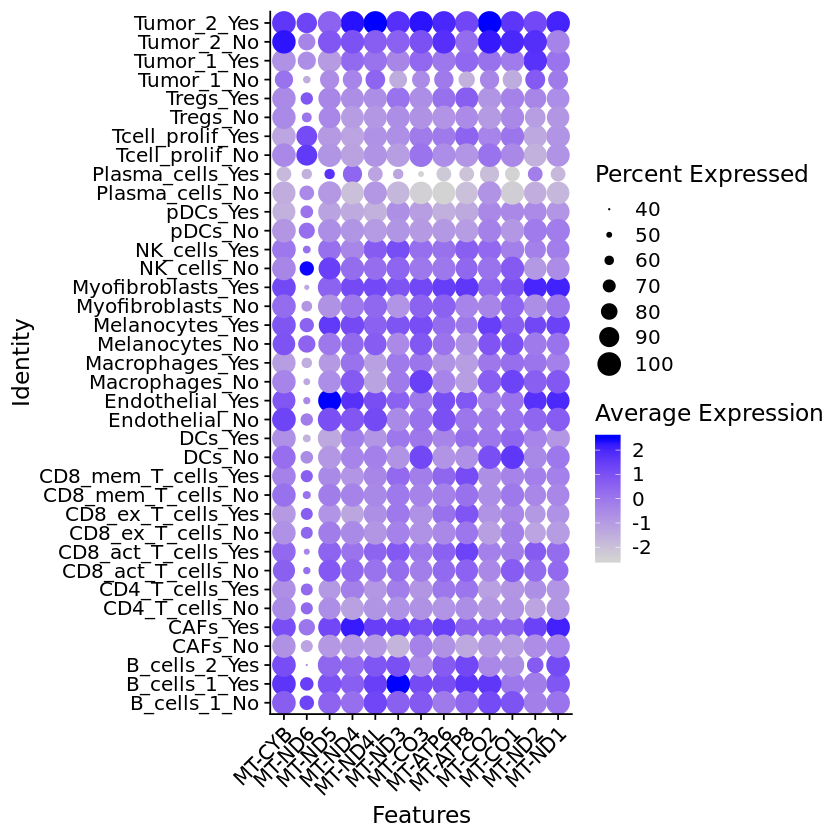

In [140]:
name = 'pre'
setwd('/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/0928_public/bcc')
DotPlot(rds, features = mito.genes) + RotatedAxis()
Idents(rds) <- 'new_type'
levels.sort = sort(levels(Idents(object = rds)))
Idents(object = rds) = factor(Idents(object = rds), levels = levels.sort)
dir.create(name)
setwd(name)
pdf1 = str_glue('{name}_compare_between_cell_groups.pdf')
pdf(pdf1,height=12,width=8)
DotPlot(object = rds, features = mito.genes) + RotatedAxis()
dev.off()

index = 0
for (type in cell_type){
    index = index + 1
    print(type)
    yes = str_glue('{type}_Yes')
    no = str_glue('{type}_No')
    tryCatch({
        markers = FindMarkers(rds, ident.1=yes, ident.2=no, features = mito.genes)
        markers$cell_type = type
        markers = tibble::rownames_to_column(markers, 'gene')
        if (index==1){
            all_markers = markers
        } else {
            all_markers = rbind(all_markers, markers)
        }        
    },error=function(e){print('no marker')} )

}
all.dat = all_markers[all_markers$p_val_adj <0.05,]
tsv1 = str_glue('{name}_MT_marker_Yes_vs_No.tsv')
write_tsv(all.dat, tsv1)

Idents(object = rds) <- 'patient'
avg = AverageExpression(rds, features = mito.genes)
dat0 = rownames_to_column(avg$RNA,'gene')
dat = tidyr::gather(dat0, key = 'patient',value='mito_exp',-gene)
dat$response = res.dic[dat$patient]
pdf2 = str_glue('{name}_compare_between_patient_groups_boxplot.pdf')
pdf(pdf2, height=12,width=10)
ggplot(dat, aes(x=response,y=mito_exp,fill=response)) + facet_wrap(~gene,ncol=3) +
  geom_boxplot(position = "dodge",outlier.shape = NA) + geom_jitter() + labs(title='Compare between patients') + 
    stat_compare_means( method="t.test",paired = F,aes(label = paste0("p = ", ..p.format..)), label.y=75 )
dev.off()

In [141]:
bcc.post = subset(x = bcc, subset = treatment=='post')

png 
  2

[1] "CD8_mem_T_cells"
[1] "CD8_ex_T_cells"
[1] "Tregs"
[1] "CD4_T_cells"
[1] "Tcell_prolif"
[1] "NK_cells"
[1] "B_cells_1"
[1] "CD8_act_T_cells"
[1] "Macrophages"
[1] "pDCs"
[1] "Plasma_cells"
[1] "DCs"
[1] "CAFs"
[1] "Endothelial"
[1] "Myofibroblasts"
[1] "B_cells_2"
[1] "Melanocytes"
[1] "Tumor_1"
[1] "Tumor_2"


Finished averaging RNA for cluster su001

Finished averaging RNA for cluster su002

Finished averaging RNA for cluster su003

Finished averaging RNA for cluster su004

Finished averaging RNA for cluster su005

Finished averaging RNA for cluster su006

Finished averaging RNA for cluster su007

Finished averaging RNA for cluster su008

Finished averaging RNA for cluster su009

Finished averaging RNA for cluster su010

Finished averaging RNA for cluster su012



png 
  2

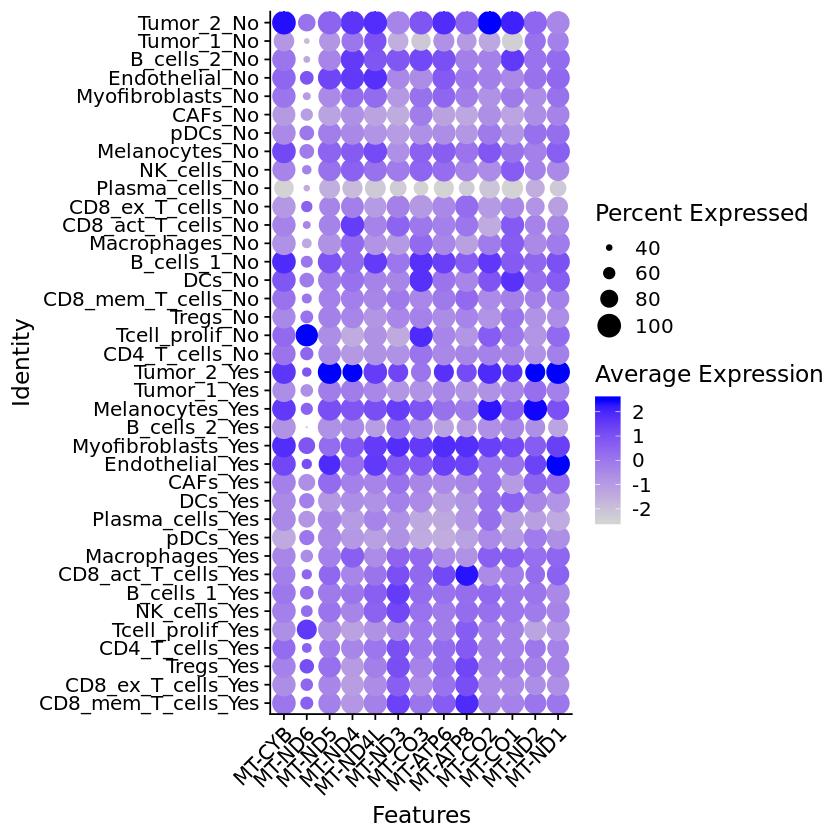

In [142]:
name = 'post'
rds = bcc.post
setwd('/SGRNJ01/RD_dir/pipeline_test/zhouyiqi/0928_public/bcc')
DotPlot(rds, features = mito.genes) + RotatedAxis()
Idents(rds) <- 'new_type'
levels.sort = sort(levels(Idents(object = rds)))
Idents(object = rds) = factor(Idents(object = rds), levels = levels.sort)
dir.create(name)
setwd(name)
pdf1 = str_glue('{name}_compare_between_cell_groups.pdf')
pdf(pdf1,height=12,width=8)
DotPlot(object = rds, features = mito.genes) + RotatedAxis()
dev.off()

index = 0
for (type in cell_type){
    index = index + 1
    print(type)
    yes = str_glue('{type}_Yes')
    no = str_glue('{type}_No')
    tryCatch({
        markers = FindMarkers(rds, ident.1=yes, ident.2=no, features = mito.genes)
        markers$cell_type = type
        markers = tibble::rownames_to_column(markers, 'gene')
        if (index==1){
            all_markers = markers
        } else {
            all_markers = rbind(all_markers, markers)
        }        
    },error=function(e){print('no marker')} )

}
all.dat = all_markers[all_markers$p_val_adj <0.05,]
tsv1 = str_glue('{name}_MT_marker_Yes_vs_No.tsv')
write_tsv(all.dat, tsv1)

Idents(object = rds) <- 'patient'
avg = AverageExpression(rds, features = mito.genes)
dat0 = rownames_to_column(avg$RNA,'gene')
dat = tidyr::gather(dat0, key = 'patient',value='mito_exp',-gene)
dat$response = res.dic[dat$patient]
pdf2 = str_glue('{name}_compare_between_patient_groups_boxplot.pdf')
pdf(pdf2, height=12,width=10)
ggplot(dat, aes(x=response,y=mito_exp,fill=response)) + facet_wrap(~gene,ncol=3) +
  geom_boxplot(position = "dodge",outlier.shape = NA) + geom_jitter() + labs(title='Compare between patients') + 
    stat_compare_means( method="t.test",paired = F,aes(label = paste0("p = ", ..p.format..)), label.y=75 )
dev.off()

In [143]:
bcc.post

An object of class Seurat 
21879 features across 31249 samples within 1 assay 
Active assay: RNA (21879 features)
 3 dimensional reductions calculated: pca, umap, tsne